## **Analysis of the statistics of the elevation difference drived by dems.**


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from utils.geotif_io import readTiff, writeTiff
from pprint import pprint
import h5py
from utils.crop2extent import img2extent
from utils.ransac_filter import ransac_filter


### **1. Read the statistic data.**

In [2]:
paths_stat_dems = 'data/aster-stereo/stat_elev_dif.h5'   ## path to save
years = [ str(year) for year in range(2003,2022)]   ## 


In [3]:
# !h5ls $paths_stat_dems
!h5ls $paths_stat_dems/tile_29_96


glacier_area_bins        Group
mean_dif_bins            Group
mean_dif_tile            Dataset {19}
std_dif_bins             Group
std_dif_tile             Dataset {19}


### 1. Read and visualize the glacier elevation change on the overall setp region.
#### 1.1 Read glacier elevation change data.


In [4]:
mean_dif_tiles, std_dif_tiles = {}, {}
with h5py.File(paths_stat_dems, "r") as f:
  for tile_id in list(f.keys()):
    mean_dif_tile = f[tile_id + '/mean_dif_tile'][:]
    std_dif_tile = f[tile_id + '/std_dif_tile'][:]
    mean_dif_tiles[tile_id] = mean_dif_tile
    std_dif_tiles[tile_id] = std_dif_tile
mean_dif_tiles_pd = pd.DataFrame(mean_dif_tiles, index=years)
std_dif_tiles_pd = pd.DataFrame(std_dif_tiles, index=years)
mean_dif_tiles_pd.head()
std_dif_tiles_pd.head()


#### 1.2 Data filtering by using ransac algorithm.

In [44]:
x = np.array([i for i in range(3,22)]) 
mean_dif_tiles_pd_filter = {}
for tile_id in mean_dif_tiles_pd.keys():
  y = mean_dif_tiles_pd[tile_id].values 
  if np.isnan(y).all():
    continue
  else:
    y_filter, y_ransac_fit = ransac_filter(x=x, y=y, thre=5)
    mean_dif_tiles_pd_filter[tile_id] = y_filter
mean_dif_tiles_pd_filter = pd.DataFrame(mean_dif_tiles_pd_filter, index=years)
mean_dif_tiles_pd_filter['tile_29_96']


2003          NaN
2004     0.398590
2005     1.278163
2006    -1.847025
2007     0.113082
2008    -1.039130
2009          NaN
2010    -6.340774
2011    -7.072071
2012    -4.663647
2013    -9.467600
2014   -10.095788
2015    -4.981722
2016    -9.194653
2017   -10.029332
2018    -8.704039
2019    -9.899227
2020   -10.321443
2021   -14.090716
Name: tile_29_96, dtype: float64

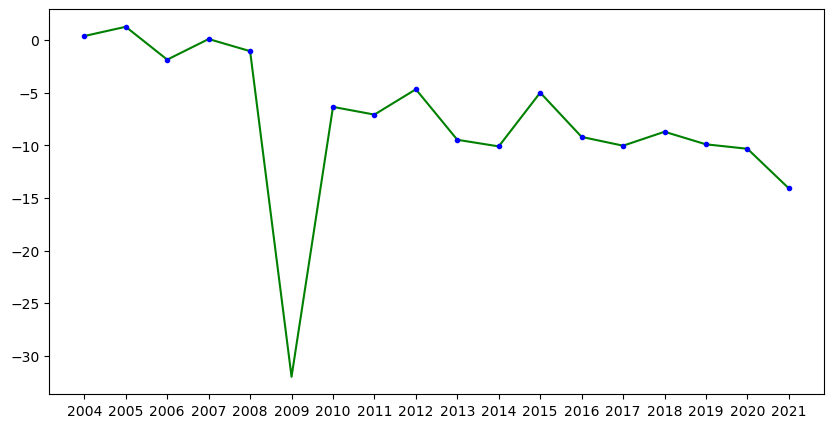

In [50]:
## show the filtered result. 
plt.figure(figsize=(10,5))
plt.plot(mean_dif_tiles_pd['tile_29_96'], 'g')
plt.plot(mean_dif_tiles_pd_filter['tile_29_96'], '.b')


In [ ]:

mean_dif_setp = mean_dif_tiles_pd.mean(axis=1)
std_dif_setp = std_dif_tiles_pd.mean(axis=1)



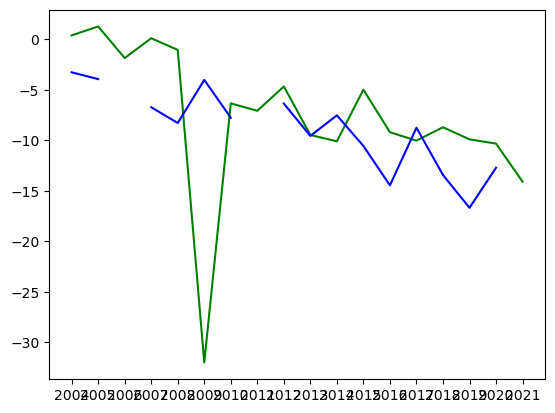

Text(0.5, 1.0, 'selected tile/overall setp')

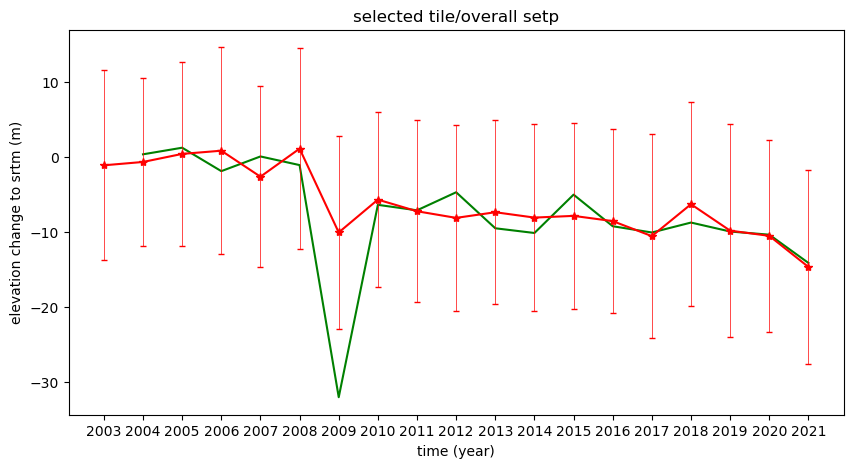

In [7]:
plt.figure(figsize=(10,5))
plt.plot(mean_dif_tiles_pd['tile_29_96'], 'g')
plt.plot(mean_dif_setp, 'r*')
plt.errorbar(mean_dif_setp.index, mean_dif_setp.values, \
                        yerr=std_dif_setp.values/2, color='r', elinewidth=0.5,capsize=2)
plt.ylabel('elevation change to srtm (m)'); plt.xlabel('time (year)')
plt.title('selected tile/overall setp')
# plt.ylim(ymin=-18, ymax=3)


### 2. Read and visualize the glacier area/elevation change of bins in one tile.
#### Take the tile_29_96 as example.

In [6]:
gla_area_bins_dict = {}
mean_dif_bins_dict = {}
with h5py.File(paths_stat_dems, "r") as f:
  gla_area_bins = f['/tile_29_96/glacier_area_bins']
  mean_dif_bins = f['/tile_29_96/mean_dif_bins']
  bins_id = list(gla_area_bins.keys())
  for bin_id in bins_id:
    gla_area_bins_dict[bin_id] = gla_area_bins[bin_id][:]
    mean_dif_bins_dict[bin_id] = mean_dif_bins[bin_id][:]
gla_area_bins_pd = pd.DataFrame(gla_area_bins_dict)
mean_dif_bins_pd = pd.DataFrame(mean_dif_bins_dict, index=years)
gla_area_bins_pd.head()
mean_dif_bins_pd.head()


,2500_2600,2600_2700,2700_2800,2800_2900,2900_3000,3000_3100,3100_3200,3200_3300,3300_3400,3400_3500,...,6500_6600,6600_6700,6700_6800,6800_6900,6900_7000,7000_7100,7100_7200,7200_7300,7300_7400,7400_7500
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,-29.953104,-22.969797,-22.261377,-23.411848,-13.245141,-7.127739,-7.195176,2.131813,-0.813988,-1.809831,...,28.310034,28.029446,38.164154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,-34.865707,-31.298435,-27.649067,-30.813787,-23.894394,-16.445036,-14.020851,0.121185,-2.891736,-2.821337,...,24.560612,30.690275,24.242531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-57.342461,-52.016899,-49.627880,-47.210754,-33.496140,-25.754625,-22.173084,-8.234666,-7.309721,-4.936972,...,24.995802,35.241608,36.937340,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'selected tile')

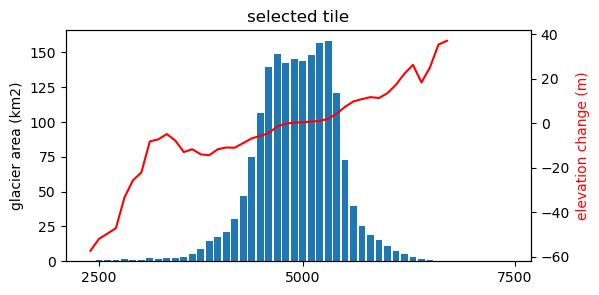

In [7]:
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(111) # Create matplotlib axes
ax1.set_ylabel('glacier area (km2)')
ax1.bar(range(len(gla_area_bins_pd.iloc[0].keys())), gla_area_bins_pd.iloc[0].values)
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.
ax2.set_ylabel('elevation change (m)', color='red')
ax2.plot(mean_dif_bins_pd.loc['2007'], 'r')
plt.xticks([1, 25, 50], [2500, 5000, 7500])
plt.xlabel('elevation (m)')
plt.title('selected tile')
